### Import modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, f_oneway

## Function block

In [2]:
'''Function to calculate IQR and 25, 75 quantile'''
def perc_iqr(col):
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    iqr = perc75 - perc25
    print(
        'First quantile: {},'.format(perc25),
        'Third quantile: {},'.format(perc75),
        "IQR: {}, ".format(iqr),
        "Outliers: [{f}, {l}].".format(f=perc25 - 1.5*iqr, l=perc75 + 1.5*iqr))
    return (perc25 - 1.5*iqr, perc75 + 1.5*iqr, perc25, perc75)

In [3]:
'''Function for boxplot'''
def get_boxplot(col, df_1, df_2):
    fig, ax = plt.subplots(1, 2, figsize = (8, 2))
    sns.boxplot(x=col, y='score', data=df_1, ax=ax[0])
    ax[0].set_title('Boxplot for ' + col)
    plt.xticks(rotation=45)
    sns.boxplot(x=col, y='score', data=df_2, ax=ax[1])
    ax[1].set_title('Boxplot for ' + col)
    plt.xticks(rotation=45)
    plt.show()

In [4]:
'''Check valid sample size function'''
def check_sample(col, df):
    valid_list = []
    cols = df.dropna()[col].unique()
    for item in cols:
        if len(df[df[col] == item]['score']) >= 20:
            valid_list.append(item)
    return valid_list

In [5]:
'''TTest function'''
def get_stat_dif(col_list, df):
    for col in col_list:
        cols = check_sample(col, df)
        if len(cols) >= 2:
            combinations_all = list(combinations(cols, 2))
            for comb in combinations_all:
                if ttest_ind(df[df[col] == comb[0]] ['score'], df[df[col] == comb[1]]['score']).pvalue <= 0.05/len(combinations_all):
                    print('Найдены статистически значимые различия Ttest для колонки', col)
                    break
        else:
            print('Not enough samples for', col)

In [6]:
'''ANOVA test function'''
def get_stat_anova(col_list, df):
    for col in col_list:
        cols = check_sample(col, df)
        if len(cols) >= 2:
            var_list = []
            for item in cols:
                var_list.append(list(df[df[col] == item]['score']))
            if f_oneway(*var_list).pvalue <= 0.05:
                print('Найдены статистически значимые различия ANOVA для колонки', col)
        else:
            print('Not enough samples for', col)

### Basic Setup (reading csv, setup)

In [36]:
data = pd.read_csv('stud_math.csv')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set()
display(data.head(10))
display(data.info())
cot_list = ['sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 
             'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
             'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
             'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']
valid_dict_str = {'school': ['GP', 'MS'], 'sex': ['F', 'M'], 'address': ['U', 'R'], 'famsize': ['GT3', 'LE3'], 
                  'pstatus': ['A', 'T'], 'mjob': ['teacher', 'health', 'services', 'at_home', 'other'], 
                  'fjob': ['teacher', 'health', 'services', 'at_home', 'other'], 
                  'reason': ['home', 'reputation', 'course', 'other'], 'guardian': ['mother', 'father', 'other'], 
                  'schoolsup': ['yes', 'no'], 'famsup': ['yes', 'no'], 'paid': ['yes', 'no'], 'activities': ['yes', 'no'], 
                  'nursery': ['yes', 'no'], 'higher': ['yes', 'no'], 'internet': ['yes', 'no'], 'romantic': ['yes', 'no']}
valid_dict_num = {'medu': [0.0, 4.0], 'fedu': [0.0, 4.0], 'traveltime': [1.0, 4.0], 
                  'studytime': [1.0, 4.0], 'failures': [0.0, 4.0], 'famrel': [1.0, 5.0], 
                  'freetime': [1.0, 5.0], 'goout': [1.0, 5.0], 'health': [1.0, 5.0]}

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

### Basic treatment

In [52]:
# Deleting non-described column
data.drop(['studytime, granular'], inplace=True, axis=1)

# Lower columns names
data.columns = data.columns.str.lower()

#Clearing Score column
data.dropna(subset = ['score'], inplace=True)
data = data[data['score'].between(0, 100, inclusive='right')].reset_index(drop=True)

KeyError: "['studytime, granular'] not found in axis"

In [38]:
data[data['score'] == 0]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


### age column

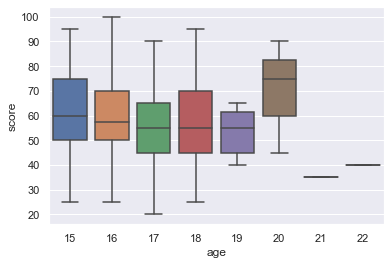

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

First quantile: 16.0, Third quantile: 18.0, IQR: 2.0,  Outliers: [13.0, 21.0].


16    96
17    90
15    76
18    69
19    16
20     3
21     1
Name: age, dtype: int64

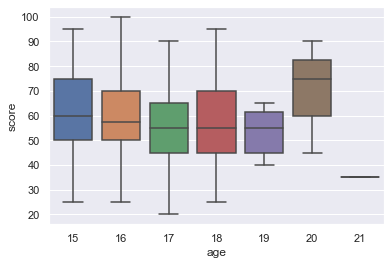

In [39]:
sns.boxplot(x='age', y='score', data=data)
plt.show()

display(data['age'].describe())
age_iqr = perc_iqr(data['age'])

# According to boxplot and IQR delete outliers
data = data[data['age'].between(age_iqr[0], age_iqr[1], inclusive='neither')]

display(data['age'].value_counts())

sns.boxplot(x='age', y='score', data=data)
plt.show()

### absences column treatment

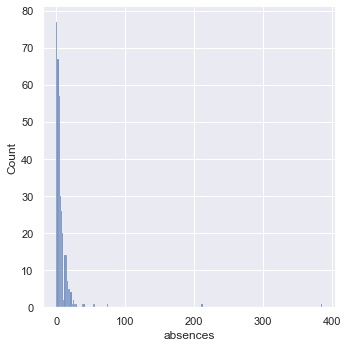

count    341.000000
mean       8.067449
std       24.737174
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 351
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  341 non-null    float64
dtypes: float64(1)
memory usage: 13.6 KB


None

First quantile: 2.0, Third quantile: 8.0, IQR: 6.0,  Outliers: [-7.0, 17.0].


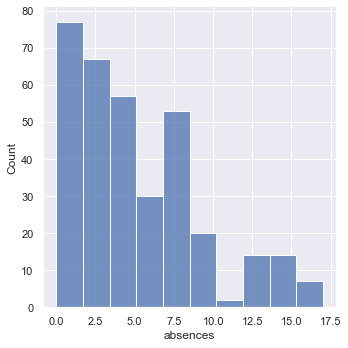

<function matplotlib.pyplot.show(close=None, block=None)>

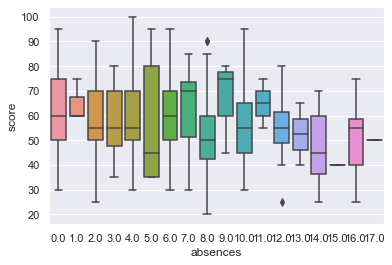

In [40]:
# Before
sns.displot(data['absences'])
plt.show()

display(data['absences'].describe())
display(pd.DataFrame(data['absences']).info())
absences_iqr = perc_iqr(data['absences'])

# According to displot and IQR I desided to reduce high outliers to perc75
data['absences'] = data['absences'].apply(lambda x: absences_iqr[3] if x > absences_iqr[1] else x)

# After
sns.displot(data['absences'])
plt.show()

sns.boxplot(x='absences', y='score', data=data)
plt.show

### Checking column data for range

In [41]:
for col in data.drop(['age', 'absences', 'score'], axis=1):
    if data[col].dtype != 'object' and col in valid_dict_num:
        data[col] = data[col].apply(lambda x: None if pd.isna(x) 
                                    else abs(x) if (x < 0 and valid_dict_num[col][0] <= abs(x) <= valid_dict_num[col][1]) 
                                    else None if not valid_dict_num[col][0] <= x <= valid_dict_num[col][1] 
                                    else x)
    else:
        data[col] = data[col].astype(str).apply(lambda x: None if x.strip() == '' else None if x not in valid_dict_str[col] 
                                                else x)

In [42]:
data.head(20)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


# Plan
## Making 3 different DafaFrames:
### 1. Delete all rows with empty cells
### 2. Delete only rows with empty cells in 'score' columns (NaN and 0)
### 3. Filling NAN cells with mode or some another data
## Work with every DF
## Select the best


In [43]:
df1 = data.dropna()
df1 = df1[df1['score'].between(0, 100, inclusive='right')].reset_index(drop=True)

In [44]:
df2 = data.copy()

In [45]:
df3 = data.copy()

## DataFrame 1 (without empty cells - deleting all raws)

## DataFrame 2 (With empty cell but Score columns)

In [46]:
df2.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.128496,-0.110289,0.106431,0.004173,0.193357,0.059252,-0.004895,0.105288,-0.034894,0.187020,-0.121579
medu,-0.128496,1.000000,0.614199,-0.165172,0.071324,-0.213732,-0.006758,0.020621,0.080020,-0.037430,0.084955,0.187362
fedu,-0.110289,0.614199,1.000000,-0.160314,-0.021174,-0.257140,-0.016464,-0.022235,0.056774,0.009141,0.001973,0.130900
traveltime,0.106431,-0.165172,-0.160314,1.000000,-0.104204,0.102888,-0.026933,-0.021618,0.032921,-0.003545,-0.048079,-0.077795
studytime,0.004173,0.071324,-0.021174,-0.104204,1.000000,-0.144656,0.062005,-0.126209,-0.023394,-0.092776,-0.063551,0.138663
failures,0.193357,-0.213732,-0.257140,0.102888,-0.144656,1.000000,-0.009272,0.121114,0.107974,0.090303,0.162824,-0.283792
famrel,0.059252,-0.006758,-0.016464,-0.026933,0.062005,-0.009272,1.000000,0.156308,0.039200,0.114533,-0.123907,0.044731
freetime,-0.004895,0.020621,-0.022235,-0.021618,-0.126209,0.121114,0.156308,1.000000,0.294065,0.077300,0.056901,-0.010068
goout,0.105288,0.080020,0.056774,0.032921,-0.023394,0.107974,0.039200,0.294065,1.000000,-0.000800,0.141322,-0.177771
health,-0.034894,-0.037430,0.009141,-0.003545,-0.092776,0.090303,0.114533,0.077300,-0.000800,1.000000,-0.021874,-0.081702


In [47]:
temp = df2.copy()
for col in temp.drop(['age', 'absences', 'score'], axis=1):
    if temp[col].dtype == 'object' and len(valid_dict_str[col]) == 2:
        temp[col] = temp[col].apply(lambda x: 0 if x == valid_dict_str[col][0] else 1 if x == valid_dict_str[col][1] else None)
temp

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,18,0.0,NaN,0.0,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,0.0,0.0,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,0.0,1.0,1.0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,0.0,0.0,1.0,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,0.0,0.0,1.0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1,1,20,0.0,1.0,0.0,2.0,2.0,services,services,course,None,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,5.0,4.0,4.0,8.0,45.0
348,1,1,17,0.0,1.0,1.0,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0,5.0,2.0,3.0,80.0
349,1,1,21,1.0,0.0,1.0,1.0,1.0,other,other,course,None,1.0,1.0,3.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,5.0,5.0,3.0,3.0,3.0,35.0
350,1,1,18,1.0,1.0,1.0,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,4.0,4.0,1.0,5.0,0.0,50.0


In [48]:
temp.corr()

,school,sex,age,address,famsize,pstatus,medu,fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,-0.013150,0.403692,0.276152,7.631797e-02,0.070891,-0.108031,-0.065113,0.243697,-0.096520,0.045435,0.144963,0.174808,0.031522,0.115135,0.122859,0.082445,1.077295e-01,-0.099985,-0.042826,0.057654,0.046738,-0.041700,-0.087984,-0.079556
sex,-0.013150,1.000000,-0.039549,-0.012624,9.181795e-02,0.029986,0.061863,0.023610,0.049911,-0.292626,0.016125,0.151946,0.158029,0.089041,-0.168850,0.008701,0.109898,-6.892603e-02,0.119210,0.051995,0.210952,0.066405,0.150352,-0.033824,0.106028
age,0.403692,-0.039549,1.000000,0.167468,4.619319e-02,-0.007939,-0.128496,-0.110289,0.106431,0.004173,0.193357,0.260638,0.117076,0.016801,0.125933,0.090974,0.154397,1.254645e-01,-0.170323,0.059252,-0.004895,0.105288,-0.034894,0.187020,-0.121579
address,0.276152,-0.012624,0.167468,1.000000,-5.666871e-02,0.055143,-0.157241,-0.096456,0.274044,0.047876,0.114569,0.023282,0.013167,0.043365,-0.088991,0.088734,0.054410,1.926387e-01,-0.013811,-0.010141,-0.050363,-0.053510,0.023025,0.056115,-0.140218
famsize,0.076318,0.091818,0.046193,-0.056669,1.000000e+00,-0.087221,-0.055609,-0.089996,0.066082,-0.084267,0.025534,0.032956,0.087258,0.097675,0.050506,-0.121485,0.033923,1.649498e-17,-0.001148,-0.013385,0.029160,0.038088,-0.051330,0.049084,0.023292
pstatus,0.070891,0.029986,-0.007939,0.055143,-8.722078e-02,1.000000,-0.130037,-0.118140,0.074790,-0.002850,0.008194,0.038038,0.007907,-0.042365,-0.110290,0.081871,0.011116,-7.963085e-02,0.036654,0.009790,0.061767,0.004175,0.016001,-0.102982,-0.016053
medu,-0.108031,0.061863,-0.128496,-0.157241,-5.560878e-02,-0.130037,1.000000,0.614199,-0.165172,0.071324,-0.213732,0.060284,-0.184263,-0.160812,-0.127081,-0.186308,-0.219071,-2.061534e-01,-0.060637,-0.006758,0.020621,0.080020,-0.037430,0.084955,0.187362
fedu,-0.065113,0.023610,-0.110289,-0.096456,-8.999637e-02,-0.118140,0.614199,1.000000,-0.160314,-0.021174,-0.257140,-0.047975,-0.215123,-0.096553,-0.099740,-0.176131,-0.169757,-1.616556e-01,-0.045163,-0.016464,-0.022235,0.056774,0.009141,0.001973,0.130900
traveltime,0.243697,0.049911,0.106431,0.274044,6.608207e-02,0.074790,-0.165172,-0.160314,1.000000,-0.104204,0.102888,0.014410,0.027853,0.048158,-0.006481,0.049357,0.146687,7.988685e-02,-0.040193,-0.026933,-0.021618,0.032921,-0.003545,-0.048079,-0.077795
studytime,-0.096520,-0.292626,0.004173,0.047876,-8.426742e-02,-0.002850,0.071324,-0.021174,-0.104204,1.000000,-0.144656,-0.010105,-0.144549,-0.195888,-0.099857,-0.069487,-0.130534,-9.674279e-02,-0.072213,0.062005,-0.126209,-0.023394,-0.092776,-0.063551,0.138663


In [49]:
df2

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,8.0,45.0
348,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
349,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
350,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


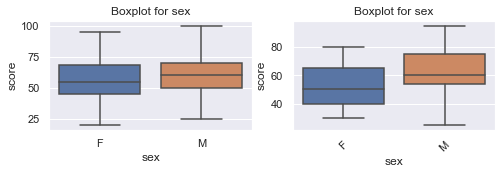

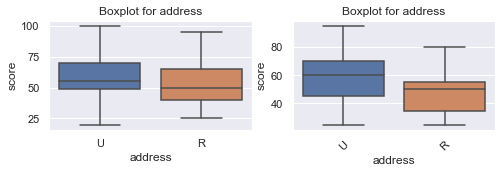

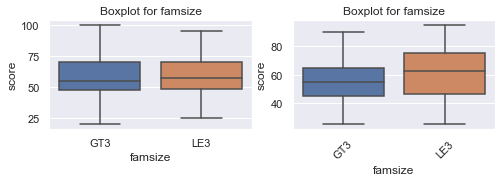

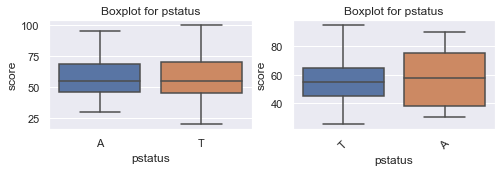

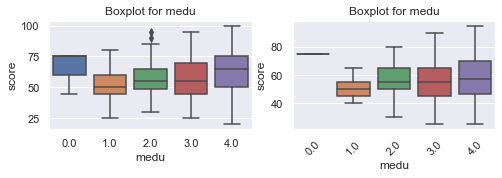

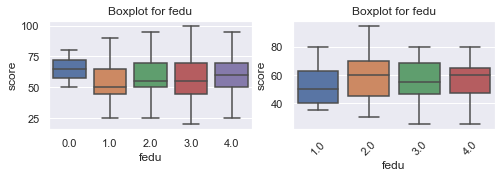

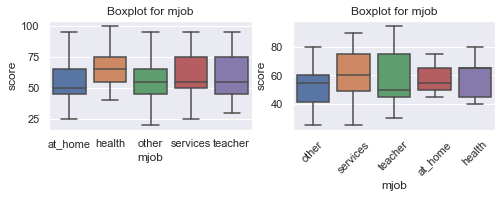

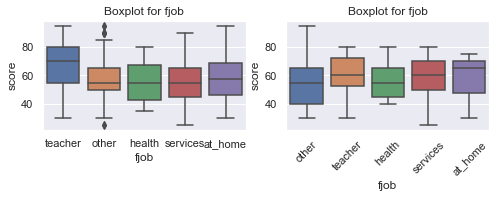

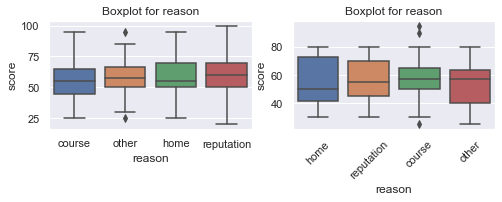

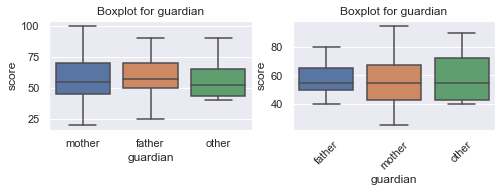

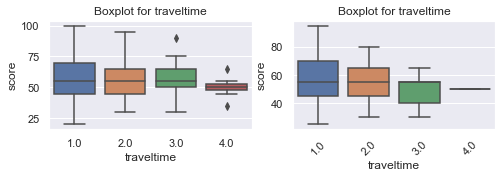

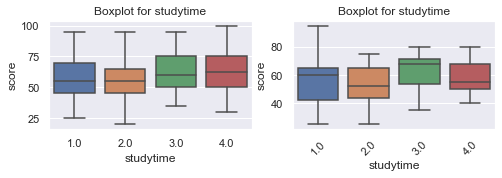

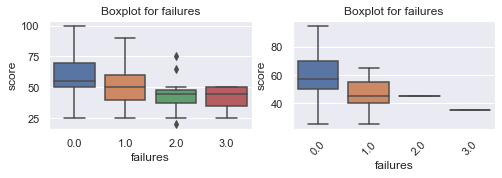

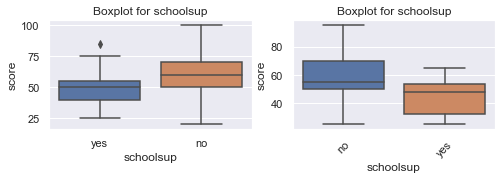

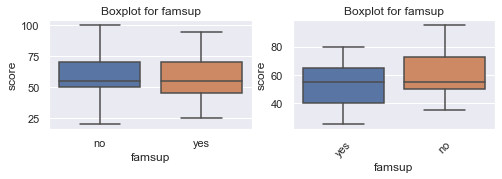

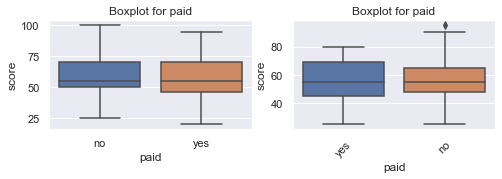

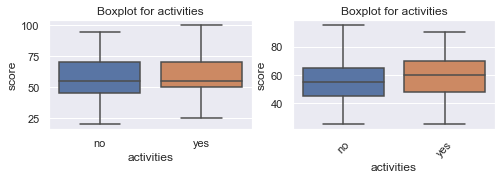

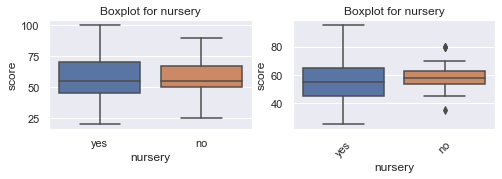

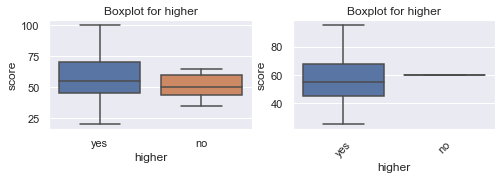

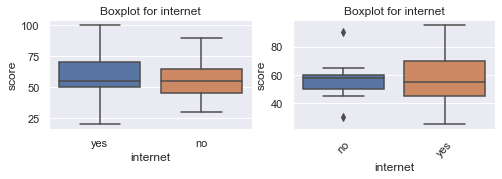

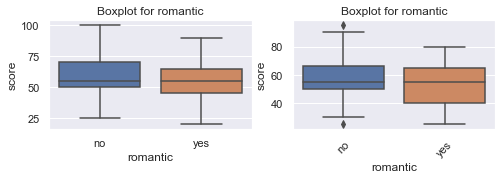

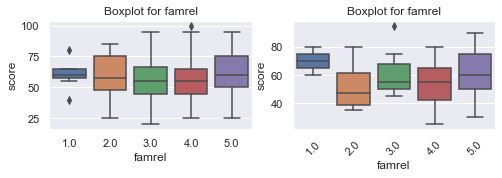

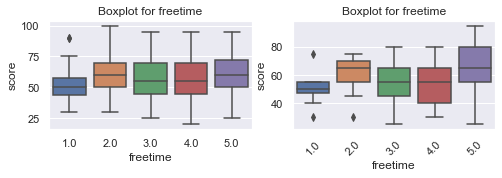

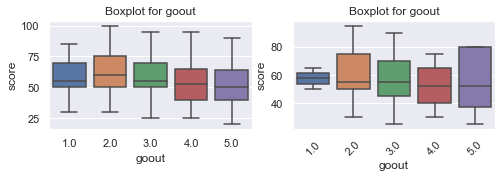

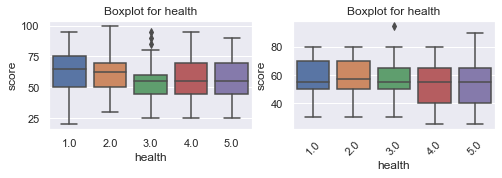

In [50]:
for item in cot_list:
    get_boxplot(item, df2, df1)

In [51]:
get_stat_dif(cot_list, df2)
get_stat_anova(cot_list, df2)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Найдены статистически значимые различия Ttest для колонки medu
Найдены статистически значимые различия Ttest для колонки fedu
Найдены статистически значимые различия Ttest для колонки mjob
Найдены статистически значимые различия Ttest для колонки fjob
Найдены статистически значимые различия Ttest для колонки studytime
Найдены статистически значимые различия Ttest для колонки failures
Найдены статистически значимые различия Ttest для колонки schoolsup
Not enough samples for higher
Найдены статистически значимые различия Ttest для колонки goout
Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Найдены статистически значимые различия ANOVA для колонки medu
Найдены статистически значимые различия ANOVA для колонки fedu
Найдены статистически значимые различия ANOVA для колонки mjob
Найден

In [22]:
get_stat_dif(cot_list, df1)
get_stat_anova(cot_list, df1)

Найдены статистически значимые различия Ttest для колонки sex
Найдены статистически значимые различия Ttest для колонки address
Найдены статистически значимые различия Ttest для колонки famsize
Not enough samples for pstatus
Not enough samples for failures
Not enough samples for schoolsup
Not enough samples for nursery
Not enough samples for higher
Not enough samples for internet
Not enough samples for health
Найдены статистически значимые различия ANOVA для колонки sex
Найдены статистически значимые различия ANOVA для колонки address
Найдены статистически значимые различия ANOVA для колонки famsize
Not enough samples for pstatus
Not enough samples for failures
Not enough samples for schoolsup
Not enough samples for nursery
Not enough samples for higher
Not enough samples for internet
Not enough samples for health


In [23]:
print(f_oneway(df2[df2['mjob'] == 'teacher'] ['score'], df2[df2['mjob'] == 'health']['score'],
        df2[df2['mjob'] == 'other'] ['score'], df2[df2['mjob'] == 'services'] ['score'],
        df2[df2['mjob'] == 'at_home'] ['score']))
print(f_oneway(df2[df2['pstatus'] == 'T'] ['score'], df2[df2['pstatus'] == 'A']['score']))

F_onewayResult(statistic=3.361802846849961, pvalue=0.010156806200798387)
F_onewayResult(statistic=0.7069552584432955, pvalue=0.40104563329213994)


In [24]:
display(df2['higher'].value_counts())

yes    350
no      18
Name: higher, dtype: int64

In [25]:
get_stat_anova(['mjob'], df2)

Найдены статистически значимые различия ANOVA для колонки mjob
